# Particle in a Box

## Motivation

To demonstrate how to use the Schrodinger equation we will look at one of the simplest quantum problems: particle in a box.  This problem simply asks what are the solutions to the Shrodinger equation for a particle that is allowed to travel in one dimension in a finite domain.

## Learning Goals

After working through these notes, you will be able to:

1. Setup and solve the Schrodinger equation for a 1D particle in a finite box
2. Normalize standard wave functions
3. Compute stastical properties from wave functions

## Coding Concepts

The following coding concepts are used in this notebook:

1. [Plotting with matplotlib](../../coding_concepts/plotting_with_matplotlib.pyplot)

## Particle in a Box: Setting up the Problem

To see the utility of the Schrodinger equation we will see what it predicts for the energy of a particle that can travel in one dimension but is restricted to a finite domain.  This can be seen as asking what the allowed energy is for a particle in a one dimensional box.  The only energy that this particle has is kinetic energy.  

![title](img/particle_in_a_box.gif)

The first step in solving this problem, as is the case for all problem involving the Schrodinger equation, is to write out the Hamiltonian.  From there, we can hopefully solve for the wave functions and the energies.  To do so we can start by writing out the classical energy and then converting the terms to quantum operators.

\begin{align}
E_{classical}(x,v) &= K(v) + V(x) \\
&= \frac{1}{2}mv^2
\end{align}
where we have used that $V(x) = 0$ as is stated in the problem.  So the total energy is just equivalent to the total kinetic energy. Since this is for a single particle the classical kinetic energy is just $\frac{1}{2}mv^2$.  

In order to write out the Hamiltonian we can always start with
\begin{align}
\hat{H} &= \hat{K} + \hat{V} \\
&= \hat{K}
\end{align}
where $\hat{K}$ is the kinetic energy operator.  If we consult the table provided in the [Schrodinger Equation notes](Schrodinger_Equation.ipynb) we see that 
\begin{align}
\hat{K} = -\frac{\hbar^2}{2m}\left(\frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} + \frac{\partial^2}{\partial x^2} \right).
\end{align}
Since this problem only involves a single dimension, we can write
\begin{align}
\hat{K} = -\frac{\hbar^2}{2m}\frac{d^2}{d x^2}.
\end{align}

Thus, the Schrodinger equation for this problem is
\begin{equation}
-\frac{\hbar^2}{2m}\frac{d^2}{d x^2}\psi(x) = E\psi(x) \quad 0\leq x\leq a
\end{equation}
and the goal is to determine $\psi(x)$ and $E$.

## Particle in a Box: Solution

We start by rewriting the Schrodinger equation for the particle in a box in the more standard differential equation form:
\begin{align}
&\frac{d^2\psi}{dx^2} = \frac{-2mE}{\hbar^2}\psi(x) \\
\Rightarrow &\frac{d^2\psi}{dx^2} + \frac{2mE}{\hbar^2}\psi(x) = 0
\end{align}

Additionally, we have the boundary conditions that 
\begin{align}
\psi(0) &= 0 \\
\psi(l) &= 0
\end{align}
The idea here is that the particle can not sit inside/on the wall.  You can think of the wall as being an infinite potential at $x=0$ and $x=l$.  

This form of differential equation and boundary conditions are exactly the problem we solved in the [Classical Wave Equation](wave_particle_duality_classical_wave_equation.ipynb) notes.  The general solution is
\begin{equation}
\psi(x) = A\cos(kx) + B\sin(kx),
\end{equation}
where $k^2 = \frac{2mE}{\hbar^2}$ in this case. 

Applying the boundary conditions to this general solution yields
\begin{align}
&A = 0 \\
&k = \frac{n\pi}{a}
\end{align}
Using two expressions for $k$ yields our solutions for $E$:
\begin{align}
E_n = \frac{h^2n^2}{8ma^2}
\end{align}

## Particle in a Box: Applications

Although this seems like a trivial problem, the model of a free particle in a finite box has been applied to actual physical systems with reasonable success.  One example is the $\pi$ electrons in a conjugated molecule.  The free electron model for butadiene does a reasonable job at reproducing the the $\pi\rightarrow\pi^*$ absorption band.

## Probabilistic Intepretation of the Wave Function

The wave function of a particle, such as the free particle, can be interpreted as the amplitude of the wave at that position.  This is analagous to the classical wave equation.  

The probability of finding a particle at position $x$ is proportional to the square of the wave function.  Specifically, 
\begin{align}
P(x) \propto \psi^*(x)\psi(x),
\end{align}
where $\psi^*(x)$ is the complex conjugate of $\psi(x)$.  Note that wave functions can be complex but, if they are not, then $\psi^*(x) = \psi(x)$ and $P \propto \psi(x)^2$.

This intepretation of the wave function has some interesting and useful outcomes.  Here we will only consider three of them:

1. The wave function must be normalized
2. Probability of observing a particle in a particular domain is $\text{Prob}(x_1 \leq x \leq x_2) = \int_{x_1}^{x_2} \psi^*(x)\psi(x)dx$
3. Average properties of a particle can be computed as $<A> = \int \psi^*(x)\hat{A}\psi(x)dx$

### Wave functions must be normalized

Because the square of the wave function is related to the probability we can normalize the wave function based on 
\begin{equation}
\int_{-\infty}^{\infty} P(x) dx = \int_{-\infty}^{\infty} \psi^*(x)\psi(x)dx = 1
\end{equation}

Let's consider what this means for the particle in a box wave functions.
\begin{align}
\psi_n(x) = B_n \sin\frac{n\pi x}{a} \\
\psi_n^*(x) \psi_n(x)  = B_n^*B_n \sin^2\frac{n\pi x}{a}
\end{align}

We can determine the value for $B_n$ based on the normalization condition.
\begin{align}
\int_0^a \psi_n^*(x) \psi_n(x)dx  = |B_n|^2 \int_0^a\sin^2\frac{n\pi x}{a}dx = 1
\end{align}
where we have use the domain $0\leq x \leq a$ rather than $-\infty< x < \infty$ because that is the finite domain of this particular problem.  Now let's solve the $\sin^2$ integral
\begin{align}
\int_0^a\sin^2\frac{n\pi x}{a}dx = \frac{a}{2}
\end{align}
Thus, we have that 
\begin{align}
B = \sqrt{\frac{2}{a}}
\end{align}

Finally, our normalized particle in a box wave functions are 
\begin{equation}
\psi_n(x) = \sqrt{\frac{2}{a}} \sin\frac{n\pi x}{a}
\end{equation}

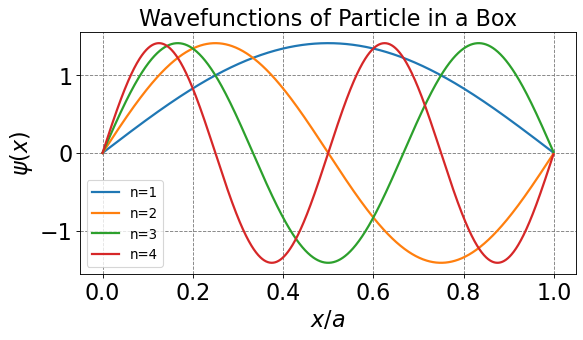

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def psi(x,n):
    a=1
    return np.sqrt(2/a)*np.sin(n*np.pi*x/a)
# make an array containing domain of wavelengths to consider
x = np.arange(0,1,0.001)
# setup plot parameters
fig = plt.figure(figsize=(8,4), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel(r'$x/a$',size=20)
ax.set_ylabel(r'$\psi(x)$',size=20)
plt.tick_params(axis='both',labelsize=20)
# plot quantum result
ax.plot(x,psi(x,1),label="n=1",lw=2)
ax.plot(x,psi(x,2),label="n=2",lw=2)
ax.plot(x,psi(x,3),label="n=3",lw=2)
ax.plot(x,psi(x,4),label="n=4",lw=2)
plt.title("Wavefunctions of Particle in a Box",fontsize=20)
# make legend
ax.legend(fontsize=12,markerscale=5.0);

### Probabiliity of Observing Particle in Finite Domain

Since the square of the wave function is a probability function, we can determine the probability of observing a particle in a particular domain using the relationship
\begin{equation}
\text{Prob}(x_1 \leq x \leq x_2) = \int_{x_1}^{x_2}P(x)dx = \int_{x_1}^{x_2} \psi^*(x)\psi(x)dx
\end{equation}

For example, compute the probability of observing the particle in a box being in the domain $\frac{a}{3} \leq x \leq \frac{2a}{3}$. We simply use the above equation and the normalized particle in a box wave function:
\begin{align}
\text{Prob}(\frac{a}{3} \leq x \leq \frac{2a}{3}) = \frac{2}{a}\int_{\frac{a}{3}}^{\frac{2a}{3}} \sin^2\frac{n\pi x}{a}dx
\end{align}

We will use the definite integral of $\sin^2ax$ from a table:
\begin{equation}
\int\sin^2axdx = \frac{x}{2} - \frac{\sin2ax}{4a}
\end{equation}
Perform $u = $ substition of the integral above to get into the table form
\begin{align}
\text{Prob}(\frac{a}{3} \leq x \leq \frac{2a}{3}) &= \frac{2}{a}\left[ \frac{x}{2} - \frac{\sin\frac{2n\pi x}{a}}{\frac{4n\pi}{a}}\right]_{\frac{a}{3}}^{\frac{2a}{3}} \\
&= \frac{2}{a}\left[ \frac{x}{2} - \frac{a\sin\frac{2n\pi x}{a}}{4n\pi}\right]_{\frac{a}{3}}^{\frac{2a}{3}} \\
&= \frac{2}{a}\left[ \frac{a}{3} - \frac{a\sin\frac{4n\pi}{3}}{4n\pi} - \frac{a}{6} + \frac{a\sin\frac{2n\pi }{3}}{4n\pi}\right] \\
&= 2\left[ \frac{1}{6}  + \frac{\sin\frac{2n\pi }{3} - \sin\frac{4n\pi}{3}}{4n\pi}\right]
\end{align}

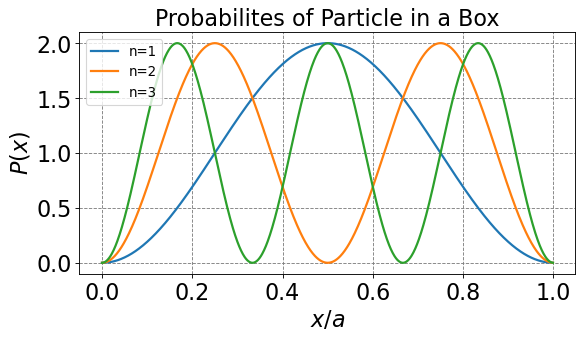

In [12]:
# plot probabilities
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def psi(x,n):
    a=1
    return np.sqrt(2/a)*np.sin(n*np.pi*x/a)
# make an array containing domain of wavelengths to consider
x = np.arange(0,1,0.001)
# setup plot parameters
fig = plt.figure(figsize=(8,4), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel(r'$x/a$',size=20)
ax.set_ylabel(r'$P(x)$',size=20)
plt.tick_params(axis='both',labelsize=20)
# plot quantum result
ax.plot(x,psi(x,1)**2,label="n=1",lw=2)
ax.plot(x,psi(x,2)**2,label="n=2",lw=2)
ax.plot(x,psi(x,3)**2,label="n=3",lw=2)
plt.title("Probabilites of Particle in a Box",fontsize=20)
# make legend
ax.legend(fontsize=12,markerscale=5.0);

### Computing Average Properties from a Wave Function

Because of the probabilistic interpretation of the wave funtion, average properties can be computed from the wave function.  The general formula is
\begin{equation}
<A> = \int \psi^*(x)\hat{A}\psi(x)dx
\end{equation}
where $\hat{A}$ is any operator.  This could be momentum, kinetic energy, etc.